## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [243]:
# Enable plotting graphs in Jupyter notebook
%matplotlib inline

In [244]:
#Importing pandas library for Data Frame
import pandas as pd

#Importing numpy
import numpy as np

#Importing ploting libraries
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Use confusion matrix to calculate accuracy measures 
from sklearn import metrics
from sklearn.metrics import classification_report

#To encode categorical features & feature scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 

#Logistic Regression Library 
from sklearn.linear_model import LogisticRegression

#Naive Bayes Library 
from sklearn.naive_bayes import GaussianNB

#mlxtend Library for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings('ignore')

In [245]:
#Loading data frame from CSV file.
df_student = pd.read_csv("students-data.csv", sep=";")
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [246]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [247]:
df_student.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [248]:
df_student[df_student.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


No Missing values found in student dataframe.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [249]:
#Showing all numric features,
print(df_student.select_dtypes(exclude=['object']).columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


In [250]:
#Showing all numeric features,
print(df_student.select_dtypes(include=['object']).columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [251]:
#Use FOR loop for Finding the variance of each feature and use np.var to know and drop variance if less than 1
for column in df_student.select_dtypes(exclude=['object']).columns:
    if np.var(df_student[column]) < 1:
        df_student.drop([column], axis=1, inplace=True)

In [252]:
df_student.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0
health,395.0,3.554430,1.390303,1.0,3.0,4.0,5.0,5.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [253]:
#enlist the values stored into categorical features
for column in df_student.select_dtypes(include=['object']).columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, df_student[column].unique()))

FEATURE NAME & VALUES = school - ['GP' 'MS']
FEATURE NAME & VALUES = sex - ['F' 'M']
FEATURE NAME & VALUES = address - ['U' 'R']
FEATURE NAME & VALUES = famsize - ['GT3' 'LE3']
FEATURE NAME & VALUES = Pstatus - ['A' 'T']
FEATURE NAME & VALUES = Mjob - ['at_home' 'health' 'other' 'services' 'teacher']
FEATURE NAME & VALUES = Fjob - ['teacher' 'other' 'services' 'health' 'at_home']
FEATURE NAME & VALUES = reason - ['course' 'other' 'home' 'reputation']
FEATURE NAME & VALUES = guardian - ['mother' 'father' 'other']
FEATURE NAME & VALUES = schoolsup - ['yes' 'no']
FEATURE NAME & VALUES = famsup - ['no' 'yes']
FEATURE NAME & VALUES = paid - ['no' 'yes']
FEATURE NAME & VALUES = activities - ['no' 'yes']
FEATURE NAME & VALUES = nursery - ['yes' 'no']
FEATURE NAME & VALUES = higher - ['yes' 'no']
FEATURE NAME & VALUES = internet - ['no' 'yes']
FEATURE NAME & VALUES = romantic - ['no' 'yes']


In [254]:
# class library to encode the values of each categorical feature
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
df_student = MultiColumnLabelEncoder(columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'
            ,'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']).fit_transform(df_student)

In [255]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [256]:
df_student.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395.0,2.169620,1.227473,0.0,2.0,2.0,3.0,4.0
Fjob,395.0,2.281013,0.863542,0.0,2.0,2.0,3.0,4.0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [257]:
df_student['G1_O'] = df_student['G1']
df_student['G2_O'] = df_student['G2']
df_student['G3_O'] = df_student['G3']
df_student['G1'] = np.where(df_student['G1'] >=10, 1, 0)
df_student['G2'] = np.where(df_student['G2'] >=10, 1, 0)
df_student['G3'] = np.where(df_student['G3'] >=10, 1, 0)

In [258]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Walc,health,absences,G1,G2,G3,G1_O,G2_O,G3_O
0,0,0,18,1,0,0,4,4,0,4,...,4,1,3,6,0,0,0,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,3,1,3,4,0,0,0,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,0,0,1,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,2,1,5,2,1,1,1,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,2,2,5,4,0,1,1,6,10,10


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [259]:
#Look at the target column which is 'G3' to understand how the data is distributed amongst the various values
df_student.groupby(["G3"]).count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,goout,Walc,health,absences,G1,G2,G1_O,G2_O,G3_O
G3,,,,,,,,,,,,,,,,,,,,,
0,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
1,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265


In [260]:
#Select all rows and first 26 columns which are the attributes
X = df_student.iloc[:,0:26]
#Select all rows and the 27th column which is the classification "Pass", "Fail" for Student Grades
Y = df_student.iloc[:,26]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

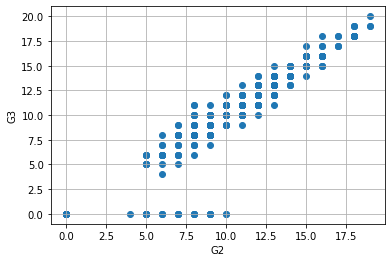

In [261]:
#Using scatter plot to describe the relationship between G2 and G3
plt.scatter(df_student["G2_O"], df_student["G3_O"])
plt.xlabel('G2')
plt.ylabel('G3')
plt.grid(True)
plt.show()

In [262]:
df_student.corr()["G3"]

school       -0.031254
sex           0.070618
age          -0.179645
address       0.052282
famsize       0.041842
Pstatus      -0.044050
Medu          0.115396
Fedu          0.108057
Mjob          0.026592
Fjob          0.028309
reason        0.099300
guardian     -0.101407
schoolsup    -0.099860
famsup       -0.059219
paid          0.092665
activities    0.012414
nursery      -0.008784
higher        0.157708
internet      0.061791
romantic     -0.097737
goout        -0.183399
Walc         -0.029957
health       -0.065668
absences     -0.092244
G1            0.642974
G2            0.825393
G3            1.000000
G1_O          0.664979
G2_O          0.725407
G3_O          0.770042
Name: G3, dtype: float64


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

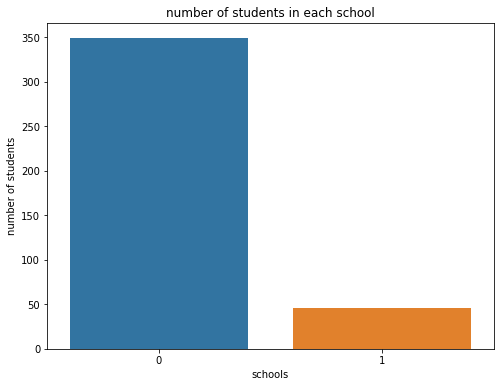

In [263]:
plt.figure(figsize=(8,6))
sx = sns.countplot(x='school',data=df_student)
sx.set_title('number of students in each school')
sx.set_xlabel('schools')
sx.set_ylabel('number of students')
plt.show()

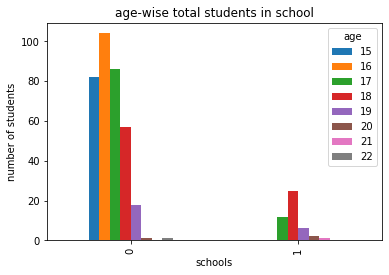

In [264]:
pd.crosstab(df_student.school, df_student.age).plot(kind='bar')
plt.title('age-wise total students in school')
plt.xlabel('schools')
plt.ylabel('number of students')
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [265]:
X = np.array(X)
Y = np.array(Y)
#spliting the data set into 70:30 training and test set
test_size = 0.30
#Using seed variable for random state
seed = 1  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(276, 26)
(119, 26)
(276,)
(119,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [266]:
#Invoking the logistics regression classifier function.
dt_model = LogisticRegression(random_state=seed)
dt_model.fit(X_train, Y_train)
print("Training Score: ", dt_model.score(X_train , Y_train))

Training Score:  0.927536231884058


In [267]:
Y_predict = dt_model.predict(X_test)
print("Testing Score: ", dt_model.score(X_test , Y_test))

Testing Score:  0.907563025210084


In [268]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[33  4]
 [ 7 75]]


In [269]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.95      0.91      0.93        82

    accuracy                           0.91       119
   macro avg       0.89      0.90      0.89       119
weighted avg       0.91      0.91      0.91       119



# Naive bayes with Iris data

### Import Iris.csv

In [270]:
df_iris = pd.read_csv("Iris.csv")
df_iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [271]:
#Shape of the Data Frame
df_iris.shape

(150, 5)

In [272]:
#Using info method instead of data types to understand the existence of NULL values in the columns
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [273]:
#Check summary statistics
df_iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [274]:
#Lets find if there are any NaN values in the dataset
df_iris[df_iris.isnull().any(axis=1)]

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class


No Null values reported

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [275]:
#Select all rows and first 4 columns which are the attributes
X1 = df_iris.iloc[:,0:4]
#Select all rows and the 5th column which is the classification of Classes
Y1 = df_iris.iloc[:,4]
print(X1.shape)
print(Y1.shape)

(150, 4)
(150,)


### Find the distribution of target variable (Class)

In [276]:
#Look at the target column which is 'Class' to understand how the data is distributed amongst the various values
df_iris.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

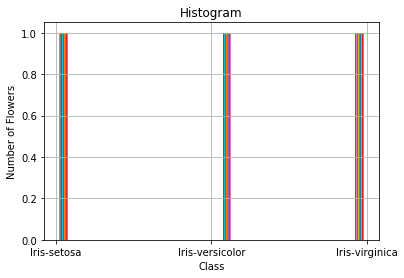

In [305]:
df_iris["Class"].hist().plot
plt.xlabel("Class") 
plt.ylabel("Number of Flowers")
plt.title("Histogram")
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

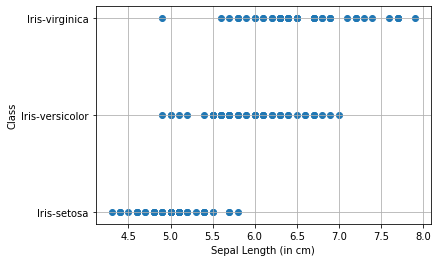

In [278]:
#Plotting scatter plot to understand the relationship between Sepal Length (in cm) and Class
plt.scatter(df_iris["Sepal Length (in cm)"], df_iris["Class"])
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Class')
plt.grid(True)
plt.show()

Insight-1 : There seems to be a possibility of getting better sigmoid curve and can be used for predicting target variable.

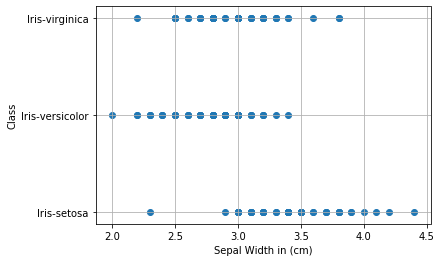

In [279]:
#Plotting scatter plot to understand the relationship between Sepal Width (in cm) and Class
plt.scatter(df_iris["Sepal Width in (cm)"], df_iris["Class"])
plt.xlabel('Sepal Width in (cm)')
plt.ylabel('Class')
plt.grid(True)
plt.show()

Insight 2 : Not a strong relationship of sepal width with target variable class

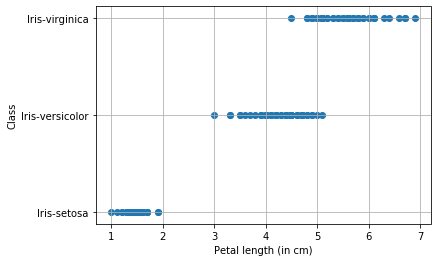

In [280]:
#Plotting scatter plot to understand the relationship between Petal Length (in cm) and Class
plt.scatter(df_iris["Petal length (in cm)"], df_iris["Class"])
plt.xlabel('Petal length (in cm)')
plt.ylabel('Class')
plt.grid(True)
plt.show()

Insight 3 : There is a clear segregation of Class 1 (0) with Petal length feature and should be used a strong predictor of target variable.

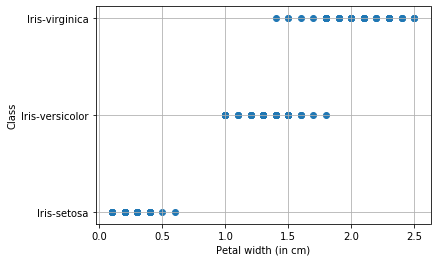

In [281]:
#Plotting scatter plot to understand the relationship between Petal Width (in cm) and Class
plt.scatter(df_iris["Petal width (in cm)"], df_iris["Class"])
plt.xlabel('Petal width (in cm)')
plt.ylabel('Class')
plt.grid(True)
plt.show()

Insight -4 : There is a clear segregation of class 1 (0) with Petal Width feature (in cm) and should be used a strong predictor of target variable.

### Summary Statistics and explain insights for at least 2 variables

In [282]:
df_iris.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
Sepal Width in (cm),150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
Petal length (in cm),150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
Petal width (in cm),150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Class,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summary :
1. Sepal Width in (cm) has very close mean and median with low standard deviation hence expected to have normal distribution.
2. Petal length (in cm) has far away mean and median with higher standard deviation hence expected to have skewed distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002744873BC88>,
      dtype=object)

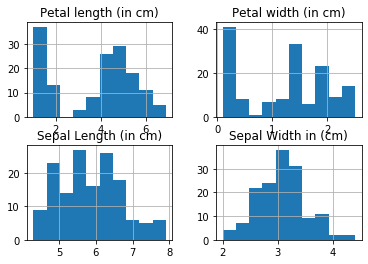

In [283]:
df_iris.hist()

### Correlation among all variables and give your insights

In [284]:
df_iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


Strong relation between Petal lenght and Petal width.

### Split data in Training and Validation in 80:20

In [285]:
X2 = np.array(X1)
Y2 = np.array(Y1)
#Taking 80:20 training and test set
test_size = 0.20
#Random number seeding for reapeatability of the code
seed = 1  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2, Y2, test_size=test_size, random_state=seed)

In [286]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score - ", gnb_model.score(X_train1 , Y_train1))
Y_predict1 = gnb_model.predict(X_test1)

print("Testing Score - ", gnb_model.score(X_test1 , Y_test1))
print("Confusion matrix below \n",metrics.confusion_matrix(Y_test1, Y_predict1))
print("Classification report below \n",classification_report(Y_test1, Y_predict1))

Training Score -  0.95
Testing Score -  0.9666666666666667
Confusion matrix below 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification report below 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Do Feature Scaling

In [287]:
# creating additional feature by mulitplying petal length and petal width & sepal length and sepal width

X1['Petal length * Petal width (in cm)'] = X1['Petal length (in cm)'] * X1['Petal width (in cm)']
X1['Sepal length * Sepal width (in cm)'] = X1['Sepal Length (in cm)'] * X1['Sepal Width in (cm)']

X2 = np.array(X1)
Y2 = np.array(Y1)
#Taking 80:20 training and test set
test_size = 0.20
#Random number seeding for reapeatability of the code
seed = 1  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2, Y2, test_size=test_size, random_state=seed)
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score: ", gnb_model.score(X_train1 , Y_train1))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test1)
print("Testing Score: ", gnb_model.score(X_test1 , Y_test1))

Training Score:  0.9416666666666667
Testing Score:  0.9333333333333333


In [288]:
#creating additional feature for each feature by squaring the values using Ploynomial library
poly = PolynomialFeatures(degree=2, include_bias = False) 
X2Poly = poly.fit_transform(X2)
#Taking 80:20 training and test set
test_size = 0.20
#Random number seeding for reapeatability of the code
seed = 1  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2Poly, Y2, test_size=test_size, random_state=seed)
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score: ", gnb_model.score(X_train1 , Y_train1))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test1)
print("Testing Score: ", gnb_model.score(X_test1 , Y_test1))

Training Score:  0.95
Testing Score:  0.9333333333333333


### Print Accuracy and Confusion Matrix and Conclude your findings

In [295]:
#Based on the suggestion and avg. score by Sequential Forward Selection (w. R^2); selecting only [2, 19] indexed 
#columns and rebuilding the model again.
X_train1 = X_train1[:,[2,19]]
X_test1 = X_test1[:,[2,19]]
print(X_train1.shape)
print(X_test1.shape)

(120, 2)
(30, 2)


In [296]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score: ", gnb_model.score(X_train1 , Y_train1))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test1)
print("Testing Score: ", gnb_model.score(X_test1 , Y_test1))

Training Score:  0.975
Testing Score:  0.9666666666666667


In [299]:
print(metrics.confusion_matrix(Y_test1, Y_predict1))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Result: 11 out of 11 i.e. 100% correct prediction accuracy for Class 0 (Iris-setosa), 12 out of 13 correct prediction for Class 1 (Iris-versicolor) and 6 out of 6 correct prediction for Class 2 (Iris-virginica).

In [300]:
print(classification_report(Y_test1, Y_predict1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

